<a href="https://colab.research.google.com/github/sarthakkaushik/Diploma-Program-in-ML-and-AI/blob/main/Cat_vs_Tog_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

#Importing packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt




In [3]:
#Loading the data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
#Unzipping the contents
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

#Assigning variable names for the training and validation set
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
#Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
#Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
#Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
#Directory with our validation dog pictures 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

#Understanding the data
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)
print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

68616192/68606236 [==============================] - 1s 0us/step
total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


#Prepping our data-Our images have to be formatted into appropriately pre-processed floating-point tensors before we can feed it to the network.

In [4]:
#Variables for convenience
batch_size=128
epochs=15
IMG_HEIGHT= 150
IMG_WIDTH= 150

#Genrator of our trainig data
train_image_genrator=ImageDataGenerator(rescale=1./255)
#Genrato of our validation data
validation_imgae_genrator=ImageDataGenerator(rescale=1./255)

train_data_gen= train_image_genrator.flow_from_directory(batch_size=batch_size,directory=train_dir, shuffle=True, target_size=(IMG_HEIGHT,IMG_WIDTH), class_mode='binary')

Found 2000 images belonging to 2 classes.


#Visualizing the training images
We will now extract a batch of images from the training generator and then plot five of them with matplotlib.


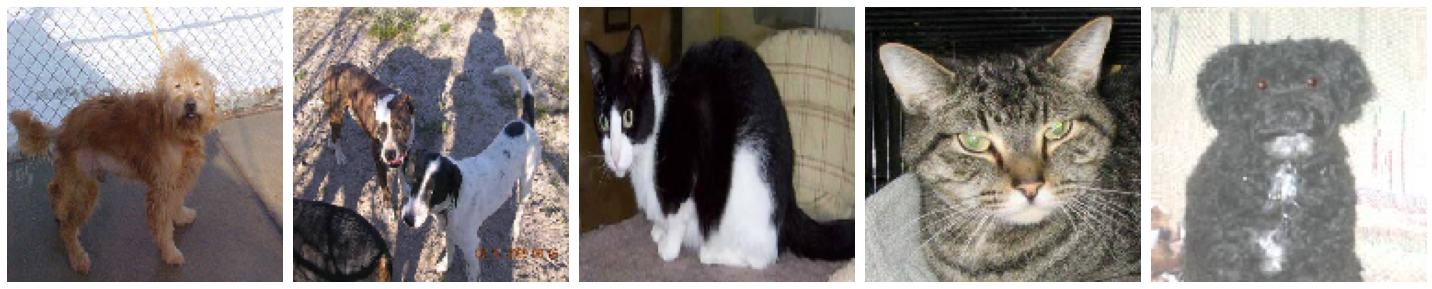

In [5]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

#Creating the model

In [13]:
model=Sequential()
model.add(Conv2D(16,3, padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPooling2D())

model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

#Falttening our dimension

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

#Output Layer
model.add(Dense(1))

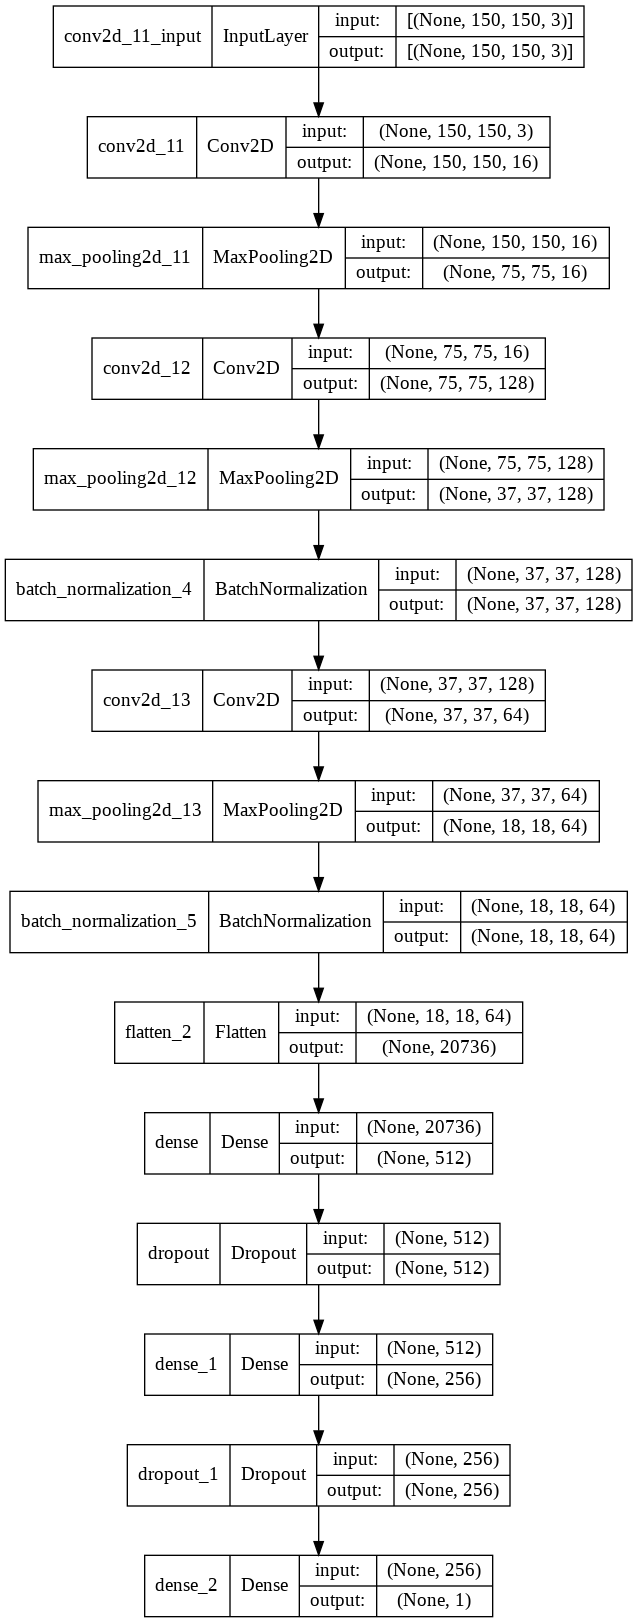

In [15]:
# summarize the model
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 128)       18560     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Batc  (None, 37, 37, 128)      512       
 hNormalization)                                                 
                                                      

In [ ]:
history = model.fit_generator(train_data_gen, steps_per_epoch=total_train, epochs=epochs,validation_data=val_data_gen,validation_steps=total_val)
